In [22]:
"""import bibliotek"""
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()


from sklearn.metrics import mean_absolute_error as mea

from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#path = 'https://github.com/dataworkshop/5dwchallenge_2019/blob/master/challenge5/input/visits.csv?raw=true'
path = './input/visits.csv'
df = pd.read_csv(path,parse_dates = ['published'],index_col = 'published')
df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134137 entries, 2008-01-01 18:19:00 to 2016-10-31 23:56:00
Data columns (total 1 columns):
post_id    134137 non-null int64
dtypes: int64(1)
memory usage: 2.0 MB


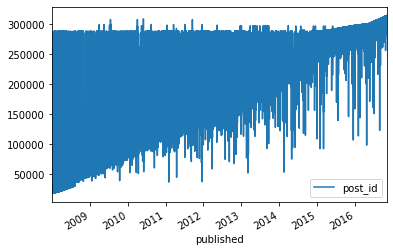

In [25]:
df.plot();

In [34]:
#ilosc wizyt per rok
df.resample('1Y').count()

,post_id
published,
2008-12-31,7743
2009-12-31,10783
2010-12-31,13091
2011-12-31,15063
2012-12-31,15972
2013-12-31,15537
2014-12-31,16180
2015-12-31,23452
2016-12-31,16316


In [35]:
#ilosc wizyt per miesiac
df.resample('1M').count()


,post_id
published,
2008-01-31,435
2008-02-29,496
2008-03-31,545
2008-04-30,597
2008-05-31,635
2008-06-30,599
2008-07-31,674
2008-08-31,677
2008-09-30,914


In [36]:
#ilosc wizyt per dzien
df.resample('1D').count()

,post_id
published,
2008-01-01,3
2008-01-02,3
2008-01-03,4
2008-01-04,14
2008-01-05,4
2008-01-06,7
2008-01-07,17
2008-01-08,8
2008-01-09,15


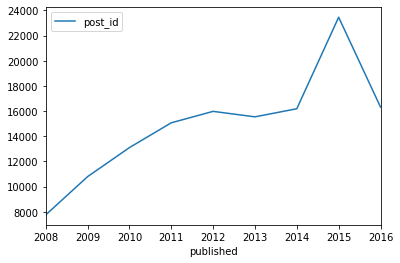

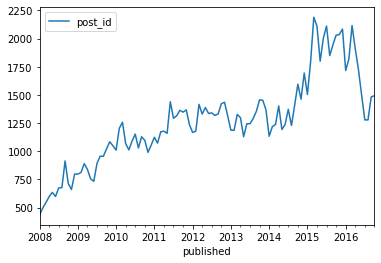

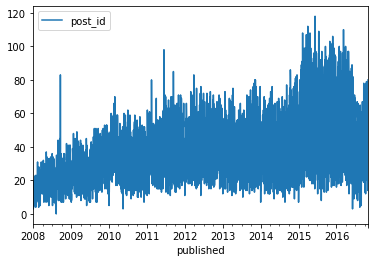

In [37]:
#wizualizacja per: rok, miesiac, dzien
df.resample('1Y').count().plot();
df.resample('1M').count().plot();
df.resample('1D').count().plot();


In [38]:
#df per dzien

df_day = df.resample('1D').count().reset_index()

#do modelu Prophet (potrzebne ds i y)
df_day.columns = ['ds','y']

df_day

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
5,2008-01-06,7
6,2008-01-07,17
7,2008-01-08,8
8,2008-01-09,15
9,2008-01-10,20


## Prophet

In [48]:
num_points_pred = 100 #ile pkr przwidujemy

In [49]:
train = df_day[:-num_points_pred]#zbior treninegowy
test = df_day [-num_points_pred:]#zbior testsowy

In [50]:
model = Prophet()

In [51]:
#trenowanie modelu
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
#ile krokow do porzdu, 'D' per dzien, include_history= False uwzgledniac historie
future = model.make_future_dataframe(periods=num_points_pred,freq = 'D',include_history=False)
future

,ds
0,2016-07-24
1,2016-07-25
2,2016-07-26
3,2016-07-27
4,2016-07-28
5,2016-07-29
6,2016-07-30
7,2016-07-31
8,2016-08-01
9,2016-08-02


In [57]:
forecast = model.predict(future)

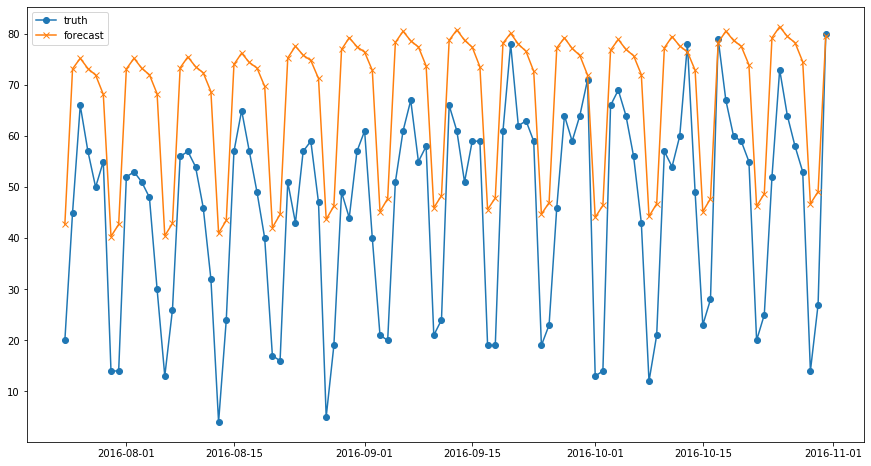

In [60]:
plt.figure(figsize=(15,8))
plt.plot(test.ds, test.y,'o-',label = 'truth');
plt.plot(test.ds, forecast.yhat,'x-',label = 'forecast');
plt.legend();


In [61]:
"""funckcja pomocnicza"""
def plot_forecast(test,forecast):
    forecast = forecast[-num_points_pred:]
    plt.figure(figsize=(15,8))
    score = round(mea(test.y,forecast.yhat),2)
    plt.title('Forecast last {} points.\n mea={}\nProphet'.format(num_points_pred,score))
    plt.plot(test.ds, test.y,'o-',label = 'truth')
    plt.plot(test.ds, forecast.yhat,'x-',label = 'forecast')
    plt.legend();

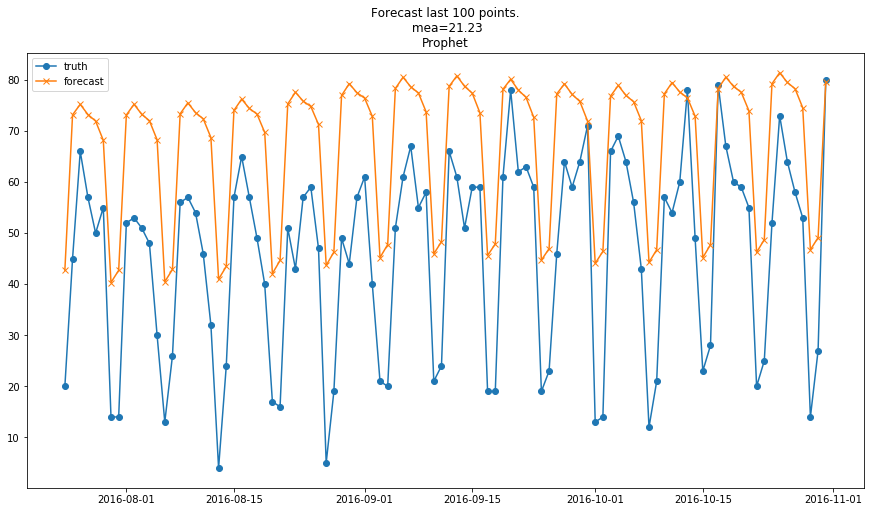

In [62]:
plot_forecast(test,forecast)

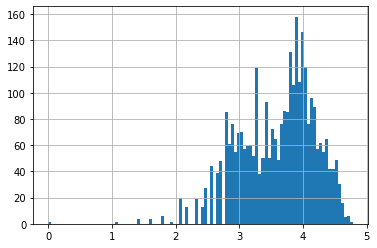

In [63]:
np.log1p(train.y).hist(bins = 100);

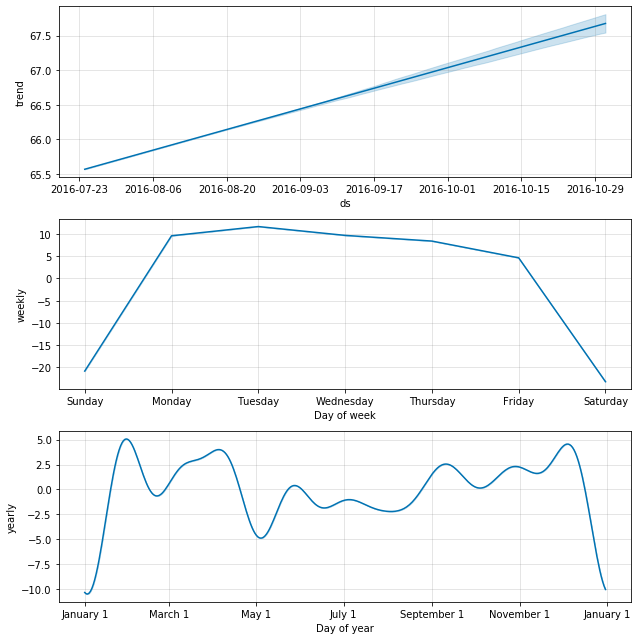

In [66]:
model.plot_components(forecast);

## Bonus

In [67]:
len(train), len (test)

(3127, 100)

In [68]:
from fbprophet.diagnostics import cross_validation
#initial 2500
#period -przesuniecie w kolejnym kroku 10
#horizon ile dni do przodu = 30
df_cv = cross_validation(model, initial = '2500 days',period='10 days', horizon='30 days')

INFO:fbprophet:Making 60 forecasts with cutoffs between 2014-11-11 00:00:00 and 2016-06-23 00:00:00


In [69]:
#ile pkt przewidziano
df_cv.shape

(1800, 6)

In [70]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-11-12,52.380845,39.882607,64.647094,75,2014-11-11
1,2014-11-13,51.117688,39.810142,63.009149,72,2014-11-11
2,2014-11-14,48.707290,36.524510,60.667879,60,2014-11-11
3,2014-11-15,25.653702,13.883774,36.855703,20,2014-11-11
4,2014-11-16,26.726292,14.228230,38.545373,26,2014-11-11
5,2014-11-17,52.808066,42.109669,65.308298,74,2014-11-11
6,2014-11-18,53.938203,42.162977,66.414342,76,2014-11-11
7,2014-11-19,52.642072,41.679931,63.869430,71,2014-11-11
8,2014-11-20,51.531396,40.178297,62.171149,55,2014-11-11
9,2014-11-21,49.271187,37.802688,61.046877,62,2014-11-11


In [71]:
df_cv.groupby('cutoff').count()

,ds,yhat,yhat_lower,yhat_upper,y
cutoff,,,,,
2014-11-11,30,30,30,30,30
2014-11-21,30,30,30,30,30
2014-12-01,30,30,30,30,30
2014-12-11,30,30,30,30,30
2014-12-21,30,30,30,30,30
2014-12-31,30,30,30,30,30
2015-01-10,30,30,30,30,30
2015-01-20,30,30,30,30,30
2015-01-30,30,30,30,30,30


In [72]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [73]:
#metryki sukcesu
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
0,3 days,347.669536,18.645899,15.538596,0.504306,0.455556
1,4 days,317.638012,17.822402,15.130433,0.395891,0.461111
2,5 days,327.680340,18.101943,15.221285,0.410910,0.466667
3,6 days,339.751243,18.432342,15.190313,0.406196,0.488889
4,7 days,368.566496,19.198086,15.731338,0.415546,0.450000
5,8 days,360.962317,18.999008,15.390783,0.403732,0.483333
6,9 days,347.148692,18.631927,15.107647,0.404008,0.494444
7,10 days,389.514455,19.736121,15.865293,0.431641,0.488889
8,11 days,394.643355,19.865633,15.924904,0.516025,0.466667
9,12 days,401.788047,20.044651,16.476899,0.522027,0.427778


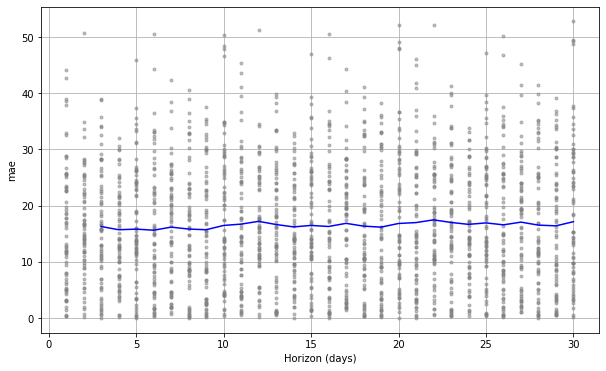

In [74]:
#wizualizacja stablina ok 16-17
plot_cross_validation_metric(df_cv,'mae');

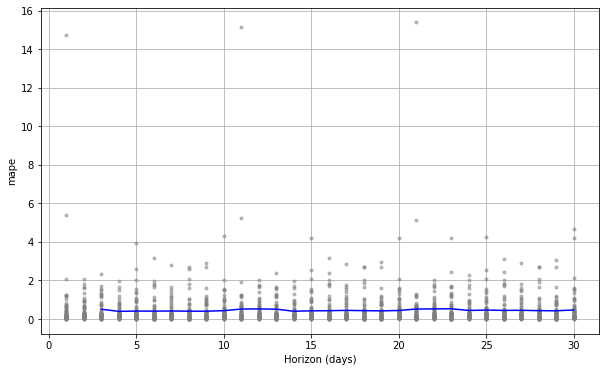

In [74]:
##wizualizacja mapa wyważona w procentach ok. 1 %
plot_cross_validation_metric(df_cv,'mape');

In [75]:
num_points_pred = 100 #ile pkt przewidujemy
train = df_day[:-num_points_pred]#zbior treninegowy
test = df_day [-num_points_pred:]#zbior testsowy

train_log = train.copy()
train_log ['y'] = np.log1p(train_log['y'])

In [78]:
#changepoint_prior_scale jak bardzo model jest czuly na zmiany trendu
model = Prophet(changepoint_prior_scale=0.01)
model.fit(train_log)

future = model.make_future_dataframe(periods=num_points_pred,freq = 'D',include_history=False)
#future

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


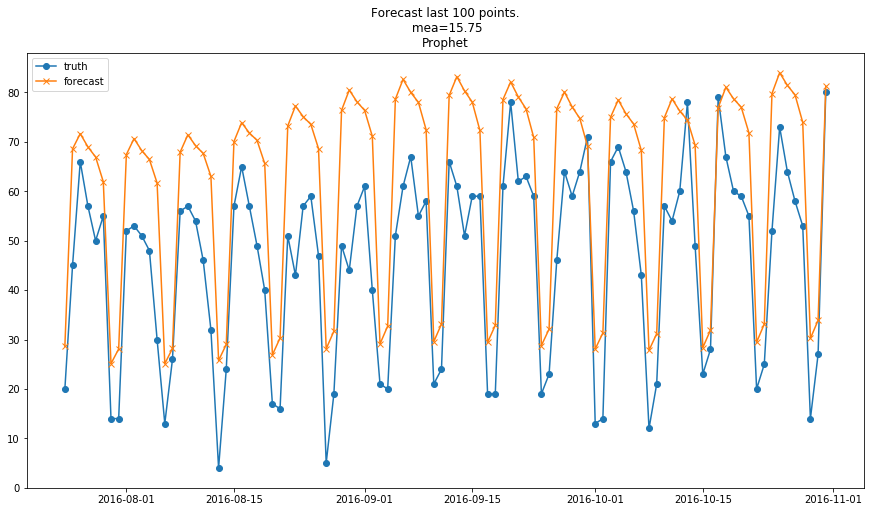

In [79]:
forecast = model.predict(future)
forecast['yhat'] = np.expm1(forecast.yhat)
plot_forecast (test,forecast)
